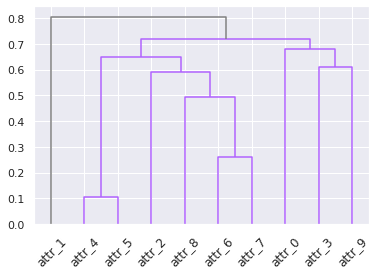

In [44]:
# Init
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Load data
from sklearn.datasets import load_diabetes

# Clustering
from scipy.cluster.hierarchy import dendrogram, fcluster, leaves_list
from scipy.spatial import distance
from fastcluster import linkage # You can use SciPy one too

%matplotlib inline

# Dataset
A_data = load_diabetes().data
DF_diabetes = pd.DataFrame(A_data, columns = ["attr_%d" % j for j in range(A_data.shape[1])])

# Absolute value of correlation matrix, then subtract from 1 for disimilarity
DF_dism = 1 - np.abs(DF_diabetes.corr())

# Compute average linkage
A_dist = distance.squareform(DF_dism.values)
Z = linkage(A_dist,method="average")

dflt_col = "#808080"   # Unclustered gray
D_leaf_colors = {"attr_1": dflt_col,

                 "attr_4": "#B061FF", # Cluster 1 indigo
                 "attr_5": "#B061FF",
                 "attr_2": "#B061FF",
                 "attr_8": "#B061FF",
                 "attr_6": "#B061FF",
                 "attr_7": "#B061FF",

                 "attr_0": "#B061FF", # Cluster 2 cyan
                 "attr_3": "#B061FF",
                 "attr_9": "#B061FF",
 
}

# notes:
# * rows in Z correspond to "inverted U" links that connect clusters
# * rows are ordered by increasing distance
# * if the colors of the connected clusters match, use that color for link

link_cols = {}
for i, i12 in enumerate(Z[:,:2].astype(int)):
    c1, c2 = (link_cols[x] if x > len(Z) else D_leaf_colors["attr_%d"%x] for x in i12)
    link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col

# Dendrogram
D = dendrogram(Z=Z, labels=DF_dism.index, color_threshold=None, leaf_font_size=12, leaf_rotation=45, link_color_func=lambda x: link_cols[x], truncate_mode='lastp', p=10)

In [39]:
link_cols

{10: '#B061FF',
 11: '#B061FF',
 12: '#B061FF',
 13: '#B061FF',
 14: '#B061FF',
 15: '#B061FF',
 16: '#B061FF',
 17: '#B061FF',
 18: '#808080'}

In [38]:
Z

array([[ 4.        ,  5.        ,  0.10333704,  2.        ],
       [ 6.        ,  7.        ,  0.26150727,  2.        ],
       [ 8.        , 11.        ,  0.4917828 ,  3.        ],
       [ 2.        , 12.        ,  0.59107459,  4.        ],
       [ 3.        ,  9.        ,  0.60957062,  2.        ],
       [10.        , 13.        ,  0.65064998,  6.        ],
       [ 0.        , 14.        ,  0.68142114,  3.        ],
       [15.        , 16.        ,  0.72066112,  9.        ],
       [ 1.        , 17.        ,  0.80554653, 10.        ]])

In [42]:
import random
r = random.random() 
b = random.random() 
g = random.random() 
  
color = (r, g, b) 

In [43]:
color

(0.7912601926568751, 0.08680607132631213, 0.2106446889860426)